# Finalterm

SEOYEON CHOI  
12/13/22

> 기말고사

In [2]:
import torch 
from fastai.text.all import *

## `1`. COVID19 tweets $\to$ 텍스트생성 (30점)

아래의 코드를 이용하여 자료를 다운로드 하라.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/STML2022/main/posts/Corona_NLP_train.csv',encoding="ISO-8859-1")
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative
41154,44953,89905,NaN,14-04-2020,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral


`(1)` `TextDataLoaders.from_df`을 이용하여 dls오브젝트를 만들어라.

-   text_col=‘OriginalTweet’ 로 설정
-   is_lm=True 로 설정
-   seq_len=64 로 설정

In [4]:
## 올바르게 dls를 생성하였을 경우 dls.show_batch()의 결과는 아래와 같음. 

In [11]:
dls = TextDataLoaders.from_df(df,is_lm=True,seq_len=64,text_col='OriginalTweet')

In [12]:
dls.show_batch()

,text,text_
0,"xxbos xxmaj i 'd like to say i xxunk this up because of # covid_19 quarantine , but i work in a grocery store and thankfully i still have a job . \r\r\n\r\r\n i did have a blast making it . \r\r\n\r\r\n▁ # dinner # pasta # xxunk # xxunk ▁ https : / / t.co / xxunk xxbos @gavinnewsom gavinnewsom xxmaj gov .","xxmaj i 'd like to say i xxunk this up because of # covid_19 quarantine , but i work in a grocery store and thankfully i still have a job . \r\r\n\r\r\n i did have a blast making it . \r\r\n\r\r\n▁ # dinner # pasta # xxunk # xxunk ▁ https : / / t.co / xxunk xxbos @gavinnewsom gavinnewsom xxmaj gov . xxmaj"
1,https : / / t.co / xxunk xxbos xxmaj wow @donaldjtrumpjr do you have a pair of these xxunk just popped up in my xxmaj facebook feed ! xxmaj buying them to support online shopping and xxmaj trump ! https : / / t.co / xxunk # coronavirus # trump2020 https : / / t.co / xxunk xxbos xxmaj if you or your loved,: / / t.co / xxunk xxbos xxmaj wow @donaldjtrumpjr do you have a pair of these xxunk just popped up in my xxmaj facebook feed ! xxmaj buying them to support online shopping and xxmaj trump ! https : / / t.co / xxunk # coronavirus # trump2020 https : / / t.co / xxunk xxbos xxmaj if you or your loved one
2,"now looking at some sort of super gel . i thought i was gon na save money by cooking b xxrep 4 u t that money is going to online shopping xxrep 5 ? \r\r\n▁ # coronavirus # life xxbos xxup covid - alert : xxmaj coronavirus xxmaj crashes xxmaj prices for xxmaj hotels , xxmaj rental xxmaj cars , and xxmaj women 's","looking at some sort of super gel . i thought i was gon na save money by cooking b xxrep 4 u t that money is going to online shopping xxrep 5 ? \r\r\n▁ # coronavirus # life xxbos xxup covid - alert : xxmaj coronavirus xxmaj crashes xxmaj prices for xxmaj hotels , xxmaj rental xxmaj cars , and xxmaj women 's xxmaj"
3,the window of a house in # xxmaj xxunk # xxmaj xxunk today while driving to supermarket . # happy # coronavirus # xxunk https : / / t.co / xxunk xxbos xxup covid 19 xxmaj requires xxmaj website xxmaj accessibility xxmaj xxunk for consumer - facing xxmaj businesses https : / / t.co / xxunk xxbos all these stores have sales cause of,window of a house in # xxmaj xxunk # xxmaj xxunk today while driving to supermarket . # happy # coronavirus # xxunk https : / / t.co / xxunk xxbos xxup covid 19 xxmaj requires xxmaj website xxmaj accessibility xxmaj xxunk for consumer - facing xxmaj businesses https : / / t.co / xxunk xxbos all these stores have sales cause of covid-19
4,"xxmaj business xxmaj alive xxmaj during xxmaj epidemic \r\r\n▁ # xxup prices # xxmaj business # epidemic # socialmediamarketing # covid_19 # coronavirus # seo # xxunk # xxunk # smo # xxup ppc \r\r\n https : / / t.co / xxunk https : / / t.co / xxunk xxbos xxunk xxunk xxmaj prices vary from mask to mask , however it is a","business xxmaj alive xxmaj during xxmaj epidemic \r\r\n▁ # xxup prices # xxmaj business # epidemic # socialmediamarketing # covid_19 # coronavirus # seo # xxunk # xxunk # smo # xxup ppc \r\r\n https : / / t.co / xxunk https : / / t.co / xxunk xxbos xxunk xxunk xxmaj prices vary from mask to mask , however it is a necessary"
5,"# inflation , rising prices and declining purchasing power are already unavoidable due to # xxup covid-19 and low oil prices , with implications for political stability and elections in # xxmaj russia . xxunk https : / / t.co / xxunk xxbos xxmaj iâm thrilled that xxunk proactively applied to xxunk and has since been approved to temporarily reduce overage charges and expand","inflation , rising prices and declining purchasing power are already unavoidable due to # xxup covid-19 and low oil prices , with implications for political stability and elections in # xxmaj russia . xxunk https : / / t.co / xxunk xxbos xxmaj iâm thrilled that xxunk proactively applied to xxunk and has since been approved to temporarily reduce overage charges and expand internet"
6,"macron has imposed a two - 

`(2)` language_model_learner를 이용하여 오브젝트를 생성하라.
`lrnr.fine_tune(3,1e-1)`을 이용하여 학습하라.

-   arch= AWD_LSTM 이용
-   metrics = \[accuracy,perplexity\]

In [13]:
lrnr = language_model_learner(dls, arch= AWD_LSTM, metrics=[accuracy,perplexity] )

In [14]:
lrnr.fine_tune(3,1e-1)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.811512,4.503637,0.284446,90.345108,00:54


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.995195,3.870983,0.333415,47.989555,00:56
1,3.719837,3.669204,0.353983,39.220692,00:56
2,3.442434,3.596037,0.364176,36.453487,00:56


`(3)` “the price of” 이후에 이어질 단어들을 생성하라. (`n_words=20` 으로
설정할 것)

In [94]:
## 생성예시

'the price of stuff increases in other states as a result of the # coronavirus pandemic . So it makes alternatives .'

In [15]:
lrnr.predict('the price of', n_words=20) 

'the price of what we need is on Check out some Facebook websites Live with you and adapt to'

## `2`. COVID19 tweets $\to$ 분류 (30점)

아래의 코드를 이용하여 자료를 다운로드 하라.

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/STML2022/main/posts/Corona_NLP_train.csv',encoding="ISO-8859-1")
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative
41154,44953,89905,NaN,14-04-2020,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral


`(1)` `TextDataLoaders.from_df`을 이용하여 dls오브젝트를 만들어라.

-   text_col=’OriginalTweet’로 설정
-   label_col=’Sentiment’로 설정
-   seq_len=64 로 설정

In [95]:
## 올바르게 dls를 생성하였을 경우 dls.show_batch()의 결과는 아래와 같음. 

,text,category
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5",Neutral
1,xxbos xxrep 5 ? xxrep 5 ? ? ? xxrep 6 ? xxrep 5 ? xxrep 3 ? ? ? xxrep 3 ? ? ? xxrep 4 ? xxrep 3 ? xxrep 3 ? xxrep 5 ? xxrep 10 ? xxrep 5 ? xxrep 5 ? xxrep 3 ? xxrep 5 ? ? ? xxrep 4 ? xxrep 7 ? xxrep 3 ? xxrep 3 ? \r\r\n▁ # sindh government spokesman @murtazawahab1 terms # xxmaj quarantine facilities at # xxmaj xxunk border a joke . xxmaj watch the exclusive visuals of criminal negligence ? ? https : / / t.co / xxunk,Negative
2,"xxbos xxunk xxup very xxup soon xxup the xxup food xxup will xxup be xxup their xxup leverage xxup to xxup control xxup people . xxup hungry xxup people xxup are xxup easy xxup to xxup lead xxup if xxup you xxup promise xxup them xxup food . xxup they xxup are xxup not xxup just xxup killing xxup people xxup with xxup this xxup covid-19 , xxup but xxup the xxup big xxup farmers , xxup processors , xxup and xxup the xxup endless xxup chain xxup of xxup supply xxup and xxup dema",Extremely Positive
3,"xxbos xxmaj when xxmaj disneyland xxup reopens it will xxup feature a xxup harrowing xxup new xxup death - defying xxup xxunk -- xxup going to the xxup grocery xxup store & & xxup interacting w / xxup people w / in 6 ' when your xxup facemask xxup suddenly xxup slips , your xxup gloves xxup fall xxup off & & xxup you xxup forgot your xxup hand xxup sanitizer ! ! # xxmaj disneyland # xxunk # xxmaj covid_19 # xxup covid https : / / t.co / xxunk",Positive
4,"xxbos @gavinnewsom @govmurphy https : / / t.co / xxunk \r\r\n xxup this xxup is xxup why xxup the # xxup coronavirus xxup is xxup so xxup contagious , a xxup single xxup cough xxup can xxup spread xxup across a xxup supermarket xxup aisle xxup right xxup over xxup the xxup aisle xxup and xxup into xxup the xxup next xxup aisle , xxup gross xxrep 4 ! xxup what xxup took xxup you xxup so xxup long xxup to xxup sign xxup an xxup eo xxup making xxup people",Extremely Negative
5,"xxbos # xxup xxunk : # xxup worldwide , xxup y' all xxup alright xxup out xxup there ? xxup the # xxup xxunk xxup is xxup indoors xxup xxunk ' xxup care xxup of # xxup xxunk xxup behind xxup the xxup scenes , xxup xxunk ' xxup this # xxup coronavirus xxup outbreak … supermarket xxup xxunk ' xxup daily : xxup xxunk ' xxup like # xxup xxunk xxup out xxup here … . xxup bought 20 xxup xxunk https : / / t.co / xxunk",Extremely Positive
6,xxbos # xxunk ? \r\r\n\r\r\n xxup with xxup no xxup sports xxup in xxup our xxup lives i xxup wanna xxup provide xxup y all xxup with xxup quality xxup xxunk xxup with xxup lower xxup prices xxup than xxup retail xxup all xxup xxunk xxup now xxup are 40 $ xxup each xxup until xxup sports xxup returns xxup due xxup to # xxmaj covid_19 \r\r\n\r\r\n xxup dms xxup are xxup always xxup open xxrep 4 ! xxup hmu xxrep 3 ! https : / / t.co / xxunk,Extremely Negative
7,xxbos # xxup cbd xxup can not xxup cure xxup the # xxup coronavirus xxup but xxup it xxup can \r\r\n▁ ? xxup cure xxup coronavirus xxup symptoms \r\r\n▁ ? xxup ease xxup your xxup anxiety \r\r\n▁ ? xxup boost xxup immune xxup system \r\r\n▁ ? xxup act xxup as a xxup natural xxup painkiller ! \r\r\n * prices have been reduced at this difficult time to help everyone ? ? \r\r\n https : / / t.co / wrlhyzizaa # keep safe https : / / t.co / xxunk,Extremely Positive
8,"xxbos xxmaj what # coronavirus taught us : \r\r\n 1 . xxmaj to stay at home and be with family . \r\r\n 2 . xxmaj to eat home made , healthy , food . \r\r\n 3 . xxmaj to maintain hygiene . \r\r\n 4 . xxmaj to meditate . \r\r\n 5 . xxmaj to give up junk food . \r\

In [22]:
dls = TextDataLoaders.from_df(df,text_col='OriginalTweet',label_col='Sentiment',seq_len=64)

In [23]:
dls.show_batch()

,text,category
0,"xxbos xxrep 5 ? ? ? xxrep 7 ? ? ? xxrep 7 ? xxrep 4 ? xxrep 4 ? xxrep 11 ? ? ? xxrep 6 ? xxrep 4 ? , xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 3 ? ? ? ? ? xxrep 4 ? ? ? xxrep 3 ? , xxrep 4 ? ? ? ? ? xxrep 6 ? xxrep 3 ? xxrep 3 ? xxrep 3 ? ? ? xxrep 3 ? \r\r\n▁ xxrep 5 ? xxrep 6 ? ? ? xxrep 3 ? xxrep 4 ? xxrep 4 ? ? ? xxrep 4 ? xxrep 6 ? xxrep 4 ? xxrep 8 ? ? ? xxrep 6 ? ? ? xxrep 5 ? ? ? xxrep 3 ? xxrep 4 ? ? ? xxrep 7 ? xxrep 5 ? - xxrep 8 ? xxrep 5",Neutral
1,"xxbos xxrep 5 ? : xxrep 4 ? xxrep 6 ? ? xxrep 8 ? \r\r\n . \r\r\n ? ? xxrep 6 ? xxrep 4 ? ? ? 500 xxrep 5 ? xxrep 5 ? ? ? xxrep 5 ? xxrep 7 ? xxrep 4 ? xxrep 7 ? ? ? xxrep 3 ? xxrep 7 ? xxrep 4 ? xxrep 6 ? xxrep 9 ? "" xxrep 6 ? "" xxrep 4 ? xxrep 7 ? xxrep 4 ? xxrep 6 ? xxrep 7 ? xxrep 5 ? xxrep 6 ? xxrep 3 ? xxrep 7 ? ? ? xxrep 5 ? .. \r\r\n▁ # xxrep 3 ? _ xxrep 4 ? _ xxrep 6 ? _ xxrep 4 ? _ xxrep 3 ? https : / / t.co / xxunk",Neutral
2,xxbos xxup ask xxup your xxup self xxup what xxup do xxup you xxup think xxup is xxup going xxup to xxup happen xxup the xxup time xxup to xxup wake xxup up xxup is xxup now xxup do xxup you xxup think xxup food xxup going xxup to xxup be xxup xxunk xxup on xxup shop xxup shelfs .. no \r\r\n xxup do xxup you xxup think xxup food xxup rise xxup in xxup price .. yes \r\r\n xxup i m xxup going xxup to xxup stock xxup up xxup as xxup much i xxup can \r\r\n xxup food xxup ladies xxup gentleman xxup is xxup most xxup valuable xxup asset \r\r\n▁ # xxmaj coronavirus # xxup covid19 https : / / t.co / xxunk,Extremely Positive
3,"xxbos # coronavirus xxmaj people , xxup stop xxup panic xxup buying , xxup you xxup do xxup not xxup need xxup to xxup stock xxup up xxup on xxup food xxup like xxup you xxup wo n't xxup see xxup the xxup sun xxup for xxup the xxup rest xxup of xxup your xxup life , xxup no xxup one xxup told xxup us xxup to xxup stock xxup up xxup on xxup toilet xxup paper , xxup no xxup one xxup told xxup us xxup to xxup stock xxup up xxup on xxup hand xxup sanitizer , xxup just xxup regular xxup soap xxup works xxup better . ( 1 )",Positive
4,"xxbos xxup keep xxup your xxup home xxup safe & & xxup clean \r\r\n xxmaj the xxmaj best xxmaj way to xxmaj avoid the # xxmaj coronavirus is in xxmaj clean xxmaj home \r\r\n xxmaj absolutely xxmaj outstanding xxmaj cleaning @ xxmaj awesome xxmaj rates \r\r\n xxmaj prices : 2 xxmaj hours 2 xxmaj maids $ 75 + \r\r\n xxmaj serving xxmaj las # xxmaj vegas , # xxmaj summerlin , # xxmaj xxunk xxmaj city & & xxmaj more \r\r\n https : / / t.co / xxunk \r\r\n ( xxunk - xxunk \r\r\n▁ # xxup xxunk # xxup xxunk # xxup xxunk https : / / t.co / xxunk",Extremely Positive
5,"xxbos # coronavirus # xxmaj kits xxrep 3 ! # xxmaj masks ( 3 ply ) , # handsanitizer ( 75 % ) # xxunk , # xxmaj xxunk , # xxunk . xxmaj order xxmaj now xxrep 3 ! \r\r\n ( # xxmaj families # xxmaj corporations \r\r\n▁ # xxmaj entrepreneurs # hypebeast \r\r\n▁ # xxup ap # xxunk # xxmaj cnn # xxup cdc # newyork # xxmaj atlanta # stlouis # xxmaj denver # xxup xxunk \r\r\n▁ # xxmaj mayors # xxup xxunk ) \r\r\n xxmaj visit : \r\r\n https : / / t.co / xxunk https : / / t.co / xxunk",Neutral
6,xxbos # xxup lda xxmaj city xxmaj lahore xxmaj residential xxmaj files xxmaj prices xxmaj update \r\r\n xxup lda xxmaj city xxmaj lahore 5 xxmaj marla xxunk xxmaj lacs \r\r\n xxup lda xxmaj city xxmaj lahore 10 xxmaj marla xxunk xxmaj lacs \r\r\n xxup lda xxmaj city xxmaj lahore 1 xxmaj xxunk xxunk xxmaj lacs \r\r\n note : next xxmaj ballot will be xxmaj held on 18th xxmaj april 2020 \r\r\n\r\r\n xxmaj xxunk xxmaj xxunk \r\r\n xxunk xxrep 3 3 41 xxrep 3 7 16 \r\r\n\r\r\n▁ # pandemic \r\r\n▁ # coronavirusinpakistan \r\r\n▁ # covid_19 https : / / t.co / xxunk,Neutral
7,xxbos xxmaj so glad i donât : \r\r\n xxmaj live in a big city . \r\r\n xxmaj rely on takeout / dine out . \r\r\n xxmaj rely on delivery . \r\r\n xxmaj rely on transport . \r\r\n\r\r\n xxmaj so glad i xxup do : \r\r\n xxmaj have 6 month stock of food . \r\r\n xxmaj own 

`(2)` text_classifier_learner를 이용하여 오브젝트를 생성하라.
`lrnr.fine_tune(5,1e-2)`을 이용하여 학습하라.

-   arch= AWD_LSTM 이용
-   metrics = accuracy 이용

In [24]:
lrnr = text_classifier_learner(dls,AWD_LSTM,metrics=accuracy).to_fp16()

In [25]:
lrnr.fine_tune(5,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,1.451519,1.370851,0.389625,00:08


epoch,train_loss,valid_loss,accuracy,time
0,1.158805,1.060165,0.558012,00:15
1,0.940539,0.825643,0.677317,00:16
2,0.786679,0.702226,0.732839,00:16
3,0.656008,0.682333,0.743288,00:16
4,0.593655,0.661963,0.758596,00:16


`(3)` 아래의 텍스트에 대한 분류결과를 확인하라.

-   “the government’s approach to the pendemic has been a complete
    disaster”
-   “the new vaccines hold the promise of a quick return to economic
    growth”

**hint** “the government’s approach to the pendemic has been a complete
disaster” 에 대하여서는 부정으로, “the new vaccines hold the promise of
a quick return to economic growth”에 대하여서는 긍정으로 예측되어야
적절하다.

negative

In [26]:
lrnr.predict("the government's approach to the pendemic has been a complete disaster") 

('Extremely Negative',
 tensor(0),
 tensor([8.7544e-01, 3.0173e-06, 1.2416e-01, 7.9043e-05, 3.0868e-04]))

positive

In [27]:
lrnr.predict("the new vaccines hold the promise of a quick return to economic growth") 

('Extremely Positive',
 tensor(1),
 tensor([1.2628e-06, 9.2473e-01, 5.2453e-05, 4.5041e-05, 7.5169e-02]))

## `3`. human numbers 5 (40점)

아래와 같은 데이터가 있다고 하자.

In [28]:
txt = (['one',',','two',',','three',',','four',',','five',',']*100)[:-1]
mapping = {',':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5} 
txt_x = txt[:-1]
txt_y = txt[1:] 

In [29]:
txt_x[:5], txt_y[:5]

(['one', ',', 'two', ',', 'three'], [',', 'two', ',', 'three', ','])

In [59]:
def f(txt,mapping):
    return [mapping[key] for key in txt] 
sig = torch.nn.Sigmoid()
soft = torch.nn.Softmax(dim=1)
tanh = torch.nn.Tanh()

In [60]:
x = torch.nn.functional.one_hot(torch.tensor(f(txt_x,mapping))).float().to("cuda:0")
y = torch.nn.functional.one_hot(torch.tensor(f(txt_y,mapping))).float().to("cuda:0")

In [61]:
x[:5],y[:5]

(tensor([[0., 1., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.]], device='cuda:0'),
 tensor([[1., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         [1., 0., 0., 0., 0., 0.]], device='cuda:0'))

`(1)` `torch.nn.RNNCell()`을 이용하여 다음단어를 예측하는 신경망을
설계하고 학습하라.

In [120]:
torch.manual_seed(12345)
rnncell=torch.nn.RNNCell(6,20).to("cuda:0")
linr = torch.nn.Linear(20,6).to("cuda:0")

In [121]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnncell.parameters())+list(linr.parameters()))

In [122]:
T = len(x) 
for epoc in range(500): 
    ## 1~2
    loss = 0 
    ht = torch.zeros(1,20).to("cuda:0") 
    for t in range(T):
        xt,yt = x[[t]], y[[t]]
        ht = rnncell(xt,ht) 
        ot = linr(ht) 
        loss = loss + loss_fn(ot,yt) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [123]:
_water = torch.zeros(1,20).to("cuda:0") 
hidden[[0]] = rnncell(x[[0]],_water)
for t in range(1,T):
    hidden[[t]] = rnncell(x[[t]],hidden[[t-1]])

In [124]:
yhat = soft(linr(hidden))

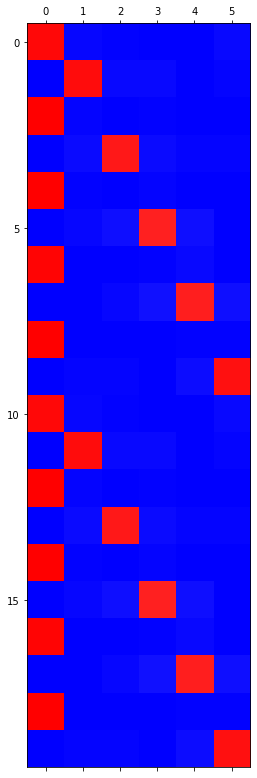

In [125]:
plt.matshow(yhat[-20:].data.to("cpu"),cmap='bwr')

`(2)` `torch.nn.RNN()`을 이용하여 다음단어를 예측하는 신경망을 설계하고
학습하라.

In [151]:
torch.manual_seed(12345)
rnn = torch.nn.RNN(6,20).to("cuda:0")
linr=torch.nn.Linear(20,6).to("cuda:0")
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(rnncell.parameters())+list(linr.parameters()))

In [152]:
_water = torch.zeros(1,20).to("cuda:0")
for epoc in range(8000):
    ## 1 
    hidden,hT = rnn(x,_water)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [153]:
yhat = soft(output)

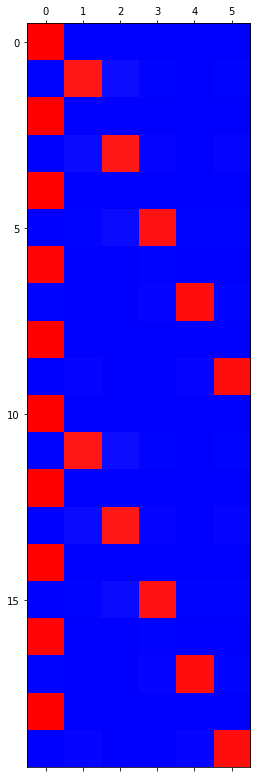

In [154]:
plt.matshow(yhat.data[-20:].to("cpu"),cmap='bwr')

`(3)` `torch.nn.LSTMCell()`을 이용하여 다음단어를 예측하는 신경망을
설계하고 학습하라.

In [236]:
torch.manual_seed(12345) 
lstmcell = torch.nn.LSTMCell(6,4).to("cuda:0") 
linr = torch.nn.Linear(4,6).to("cuda:0") 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstmcell.parameters())+list(linr.parameters()),lr=0.1)

In [237]:
for epoc in range(5000):
    ## 1
    hidden = []
    ht = torch.zeros(4).to("cuda:0")
    ct = torch.zeros(4).to("cuda:0")
    for xt,yt in zip(x,y): 
        ht,ct = lstmcell(xt,(ht,ct))
        hidden.append(ht) 
    hidden = torch.stack(hidden)
    output = linr(hidden)
    ## 2 
    loss = loss_fn(output,y)
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

In [238]:
yhat = soft(output)
yhat[:10].to("cpu").detach().numpy().round(3)

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]], dtype=float32)

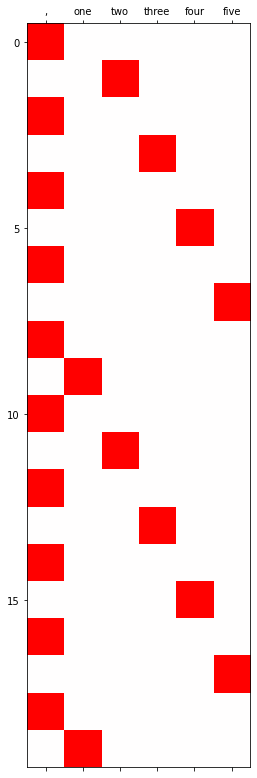

In [242]:
plt.matshow(yhat.to("cpu").data[:20],cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','one','two','three','four','five']);

`(4)` `torch.nn.LSTM()`을 이용하여 다음단어를 예측하는 신경망을 설계하고
학습하라.

In [243]:
torch.manual_seed(12345) 
lstm = torch.nn.LSTM(6,20).to("cuda:0") 
linr = torch.nn.Linear(20,6).to("cuda:0") 
loss_fn = torch.nn.CrossEntropyLoss()
optimizr = torch.optim.Adam(list(lstm.parameters())+list(linr.parameters()),lr=0.1)

In [244]:
for epoc in range(5000):
    ## 1 
    hidden, (hT,cT) =lstm(x)
    output = linr(hidden) 
    ## 2 
    loss = loss_fn(output,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizr.step()
    optimizr.zero_grad()     

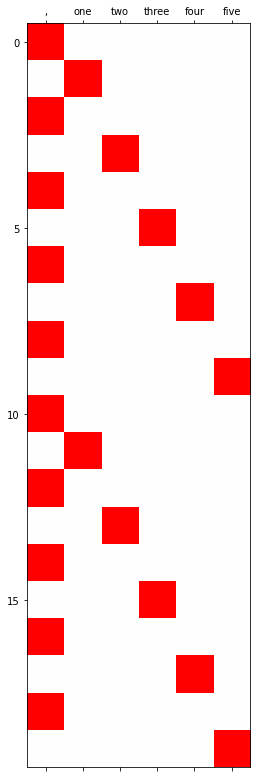

In [245]:
plt.matshow(soft(output).data[-20:].to("cpu"),cmap='bwr',vmin=-1,vmax=1)
plt.xticks(range(6),labels=[',','one','two','three','four','five']);

> 참고:
> <https://guebin.github.io/DL2022/posts/2022-11-29-13wk-2-final.html>
> 의 1번풀이를 참고하세요

# ref

https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification